In [1]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 539.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 3.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from skimage.transform import resize
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/diabetes_cleaned_dataset.csv')


Mounted at /content/drive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    int64  
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 54.1 KB


In [5]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']


In [6]:
# Normalize the input features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [7]:
# Convert tabular rows to image
def tabular_to_image(x_row, img_size=224):
    side = int(np.ceil(np.sqrt(x_row.shape[0])))
    padded = np.pad(x_row, (0, side*side - x_row.shape[0]), mode='constant')
    image = padded.reshape(side, side)
    image = np.stack([image]*3, axis=-1)
    image_resized = resize(image, (img_size, img_size), mode='reflect', anti_aliasing=True)
    return image_resized

x_images = np.array([tabular_to_image(x) for x in x_scaled])


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_images, y, test_size=0.2, random_state=42)


In [9]:
#Build EfficientNet Model
base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False  # Freeze base layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.5617 - loss: 0.6891 - val_accuracy: 0.6098 - val_loss: 0.7482
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.6360 - loss: 0.6964 - val_accuracy: 0.6098 - val_loss: 0.6936
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.7048 - loss: 0.6179 - val_accuracy: 0.3902 - val_loss: 0.7084
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.4447 - loss: 0.6958 - val_accuracy: 0.6098 - val_loss: 0.7079
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.6584 - loss: 0.6514 - val_accuracy: 0.6098 - val_loss: 0.6725
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.6851 - loss: 0.6235 - val_accuracy: 0.6098 - val_loss: 0.6749
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.6511 - loss: 0.6471 - val_accuracy: 0.6098 - val_loss: 0.6854
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.6551 - loss: 0.6543 - val_accuracy: 0.6098 - val_loss:

In [11]:
# 🧪 Evaluate
y_pred = (model.predict(x_test) > 0.5).astype("int32")
print("Test Accuracy:", accuracy_score(y_test, y_pred))


5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step
Test Accuracy: 0.6428571428571429


In [ ]:
# Extract values from history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history.get('accuracy', history.history.get('acc'))  # Some versions use 'acc'
val_accuracy = history.history.get('val_accuracy', history.history.get('val_acc'))

epochs = range(1, len(loss) + 1)


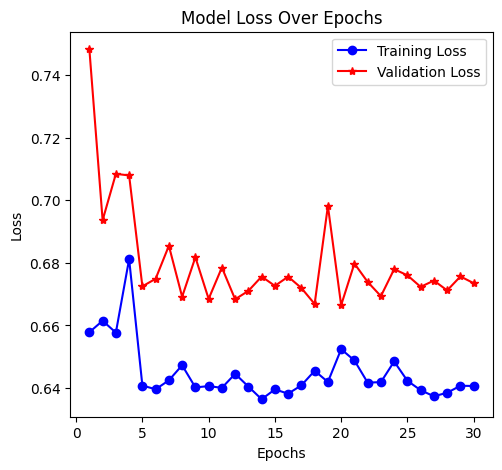

In [13]:
# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

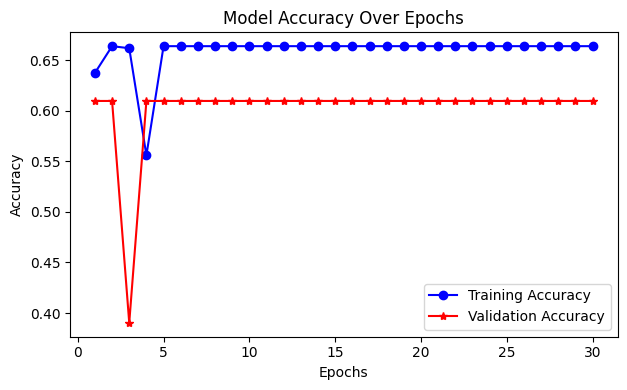

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
import tensorflow as tf
import os
import time
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
from tensorflow.python.profiler import model_analyzer
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

def evaluate_model_metrics(model, x_test, y_test, model_name="model_metrics"):
    results = {}

    # Total Parameters
    results['total_parameters'] = model.count_params()

    # FLOPs Calculation
    func = tf.function(lambda x: model(x))
    concrete_func = func.get_concrete_function(
        tf.TensorSpec([1] + list(model.input_shape[1:]), model.inputs[0].dtype)
    )
    frozen_func = convert_variables_to_constants_v2(concrete_func)
    flops = model_analyzer.profile(
        graph=frozen_func.graph,
        options=ProfileOptionBuilder.float_operation()
    ).total_float_ops
    results['FLOPs'] = flops
    results['GFLOPs'] = flops / 1e9

    # Model Size
    model_path = f"{model_name}.h5"
    model.save(model_path)
    size_bytes = os.path.getsize(model_path)
    results['model_size_bytes'] = size_bytes
    results['model_size_MB'] = size_bytes / (1024 * 1024)

    # Inference Time
    start = time.time()
    model.predict(x_test)
    end = time.time()
    results['inference_time_seconds'] = end - start

    # Accuracy
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    results['accuracy'] = acc

    return results
evaluate_model_metrics(model, x_test, y_test, model_name="model_metrics")

Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step


{'total_parameters': 4131620,
 'FLOPs': 800949208,
 'GFLOPs': 0.800949208,
 'model_size_bytes': 17916160,
 'model_size_MB': 17.086181640625,
 'inference_time_seconds': 14.896402597427368,
 'accuracy': 0.6428571343421936}